In [1]:
import CSVParser
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
%matplotlib inline

# Arm Structure
# $arm_base_length = 1.5
# $arm_shoulder_length = 0.1
# $arm_upperarm_length = 0.5
# $arm_elbow_length = 0.4
# $arm_forearm_length = 0.05
# $arm_wrist_length = 0.05
# $arm_hand_height = 0.05

class Vector(object):
    def __init__(self, x=0, y=0, z=0):
        self.x, self.y, self.z = x, y, z
  
tabX = []
tabZ = []
tabC = []

baseOffset = 1.5
armLength = 1.25

# Parse the file
tab = CSVParser.GetCSVFromFile('../Data/ik(2016-04-28.00:31:09).csv')
print tab[0]

del tab[0]
for i, line in enumerate(tab):
    for j, value in enumerate(tab[i]):
        if(j < 3):
            string = value.split(" ")
            tab[i][j] = Vector(float(string[0]),float(string[1]),float(string[2]))
        else:
            tab[i][j] = int(value)

for i, vec in enumerate(tab):
    tabX.append(tab[i][0].x)
    tabZ.append(tab[i][0].z)
    tabC.append( math.sqrt( math.pow(vec[0].x-vec[2].x,2) + math.pow(vec[0].z-vec[2].z,2) ) )
    
errorMax = max(tabC)
errorMin = min(tabC)
meanError = reduce(lambda x, y: x + y, tabC) / len(tabC)
print "error max: " + str(errorMax*100) + " centimeters"
print "error min: " + str(errorMin*100) + " centimeters"
print "mean error: " + str(meanError*100) + " centimeters"
color = tabC
#color = [x / errorMax for x in tabC]
#color = [1 - x for x in color]
print "length of resulting data: " + str(len(color))

['TARGET', 'INITIAL_POSITION', 'IK_SOLUTION', 'NB_ITERATIONS']
error max: 75.6824461529 centimeters
error min: 0.0002 centimeters
mean error: 16.1566859056 centimeters
length of resulting data: 9999


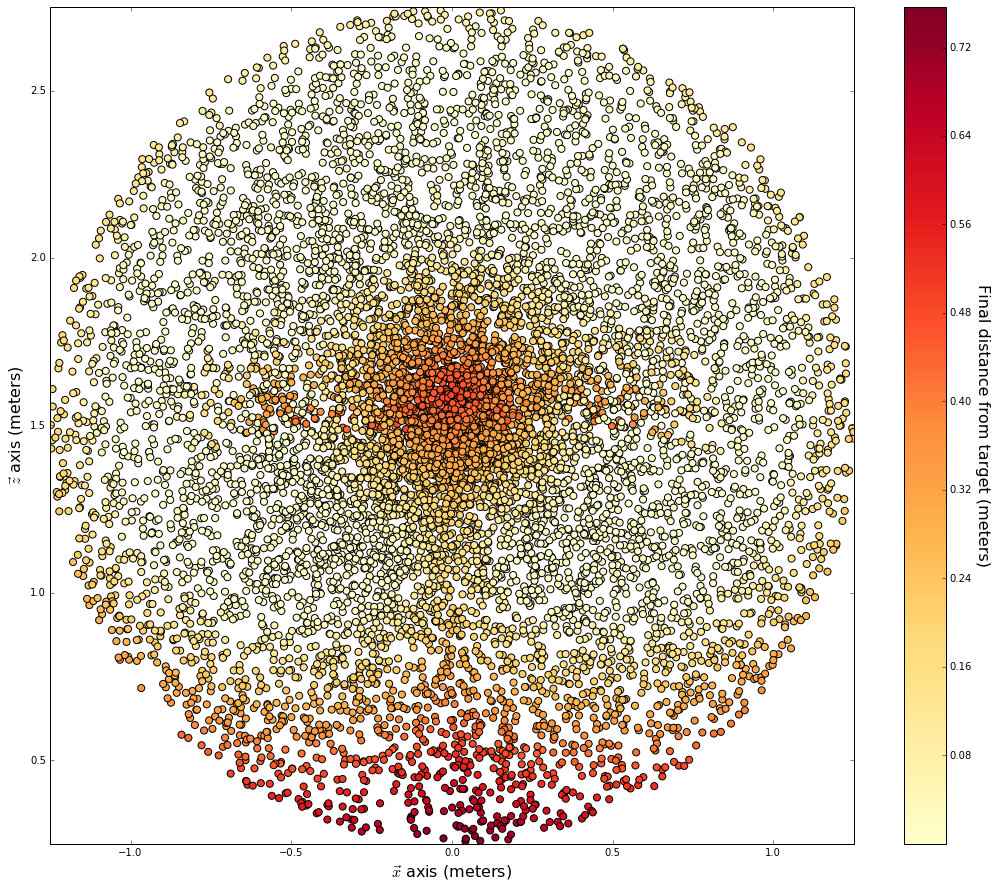

In [3]:
import matplotlib.units as units
fig = plt.figure(figsize=(18,15))
plt.scatter(tabX, tabZ, c=color, cmap="YlOrRd", marker='o', s=50)
plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.xlabel(r'$\vec{x}$ axis (meters)', fontsize=16, color='black')
plt.ylabel(r'$\vec{z}$ axis (meters)', fontsize=16, color='black')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 18
cbar.set_label('Final distance from target (meters)', fontsize=16, rotation=270)
plt.show()

In [4]:
tabX = []
tabZ = []
color = []

for i, vec in enumerate(tab):
    if tabC[i] < 0.001:
        tabX.append(tab[i][0].x)
        tabZ.append(tab[i][0].z)
        color.append( math.sqrt( math.pow(vec[0].x-vec[2].x,2) + math.pow(vec[0].z-vec[2].z,2) ) )
    
errorMax = max(color)
errorMin = min(color)
meanError = reduce(lambda x, y: x + y, color) / len(color)
print "error max: " + str(errorMax*100) + " centimeters"
print "error min: " + str(errorMin*100) + " centimeters"
print "mean error: " + str(meanError*100) + " centimeters"
color = [x / errorMax for x in color]
color = [1 - x for x in color]
print "length of resulting data: " + str(len(color))

error max: 0.1 centimeters
error min: 0.0002 centimeters
mean error: 0.0684741614565 centimeters
length of resulting data: 3079


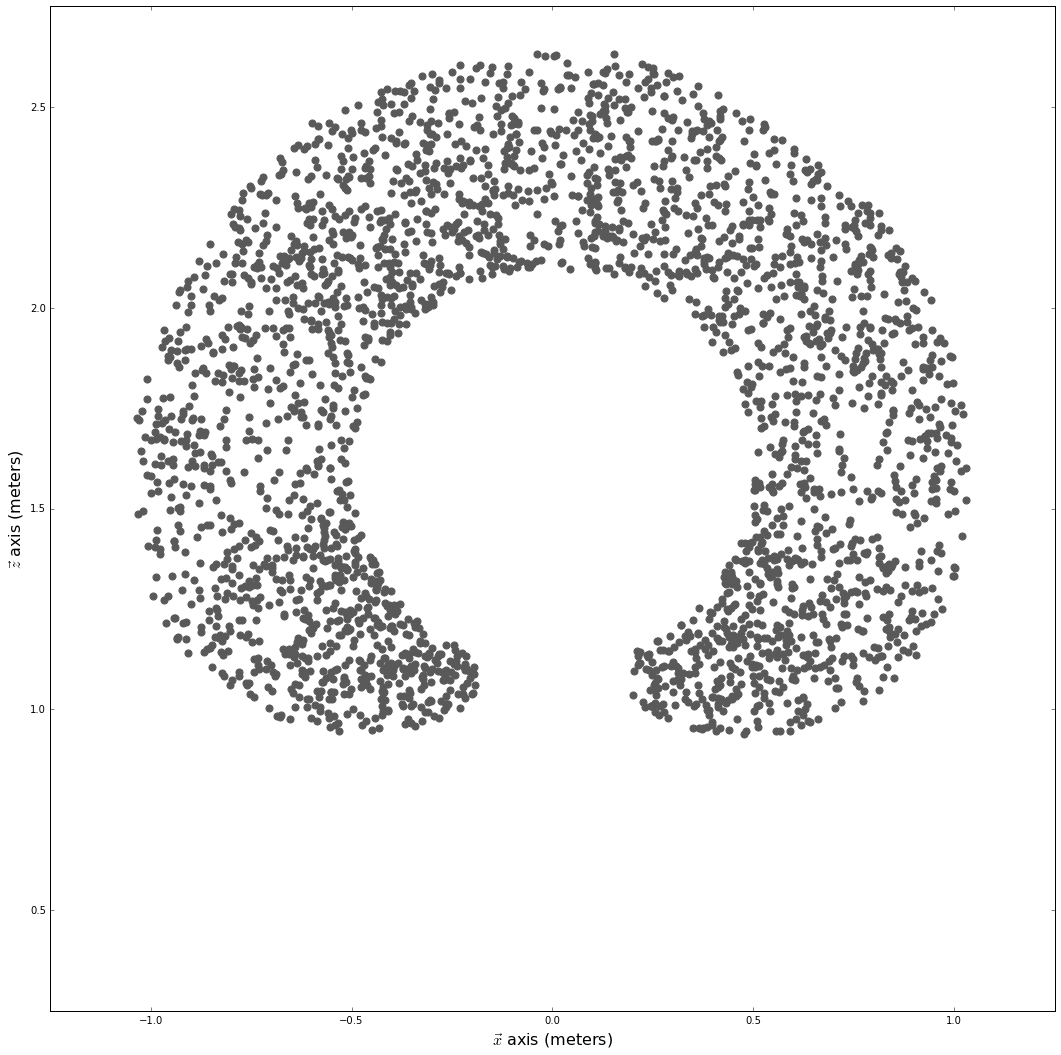

In [37]:
fig = plt.figure(figsize=(18,18))
plt.scatter(tabX, tabZ, color='0.35', marker='o', s=50)
plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.xlabel(r'$\vec{x}$ axis (meters)', fontsize=16, color='black')
plt.ylabel(r'$\vec{z}$ axis (meters)', fontsize=16, color='black')
plt.show()

In [38]:
tabX = []
tabZ = []
color = []

for i, vec in enumerate(tab):
    if tabC[i] < 0.01:
        tabX.append(tab[i][0].x)
        tabZ.append(tab[i][0].z)
        color.append( math.sqrt( math.pow(vec[0].x-vec[2].x,2) + math.pow(vec[0].z-vec[2].z,2) ) )
    
errorMax = max(color)
errorMin = min(color)
meanError = reduce(lambda x, y: x + y, color) / len(color)
print "error max: " + str(errorMax*100) + " centimeters"
print "error min: " + str(errorMin*100) + " centimeters"
print "mean error: " + str(meanError*100) + " centimeters"
color = [x / errorMax for x in color]
color = [1 - x for x in color]
print "length of resulting data: " + str(len(color))

error max: 0.998611581147 centimeters
error min: 0.0002 centimeters
mean error: 0.0931740698162 centimeters
length of resulting data: 3278


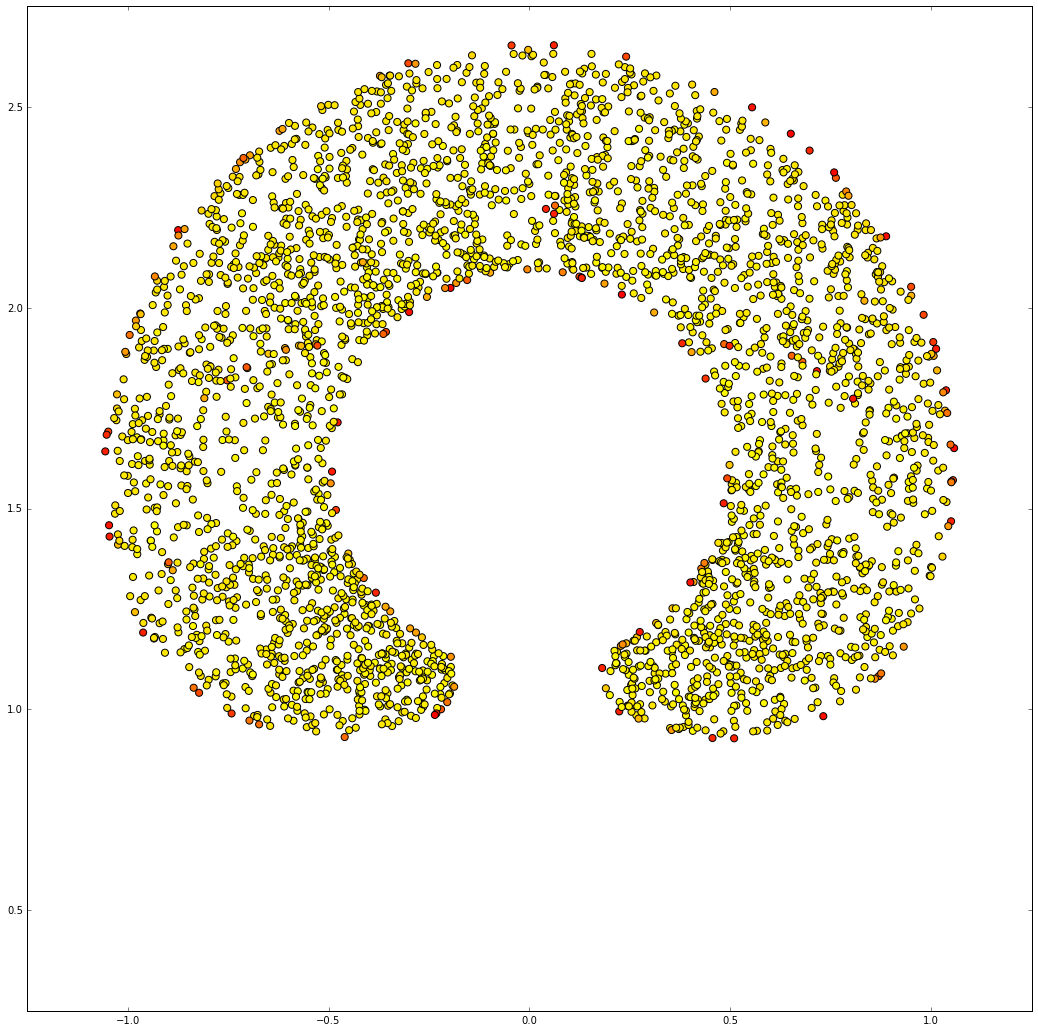

In [39]:
fig = plt.figure(figsize=(18,18))
plt.scatter(tabX, tabZ, c=color, cmap="autumn", marker='o', s=50)
plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.show()

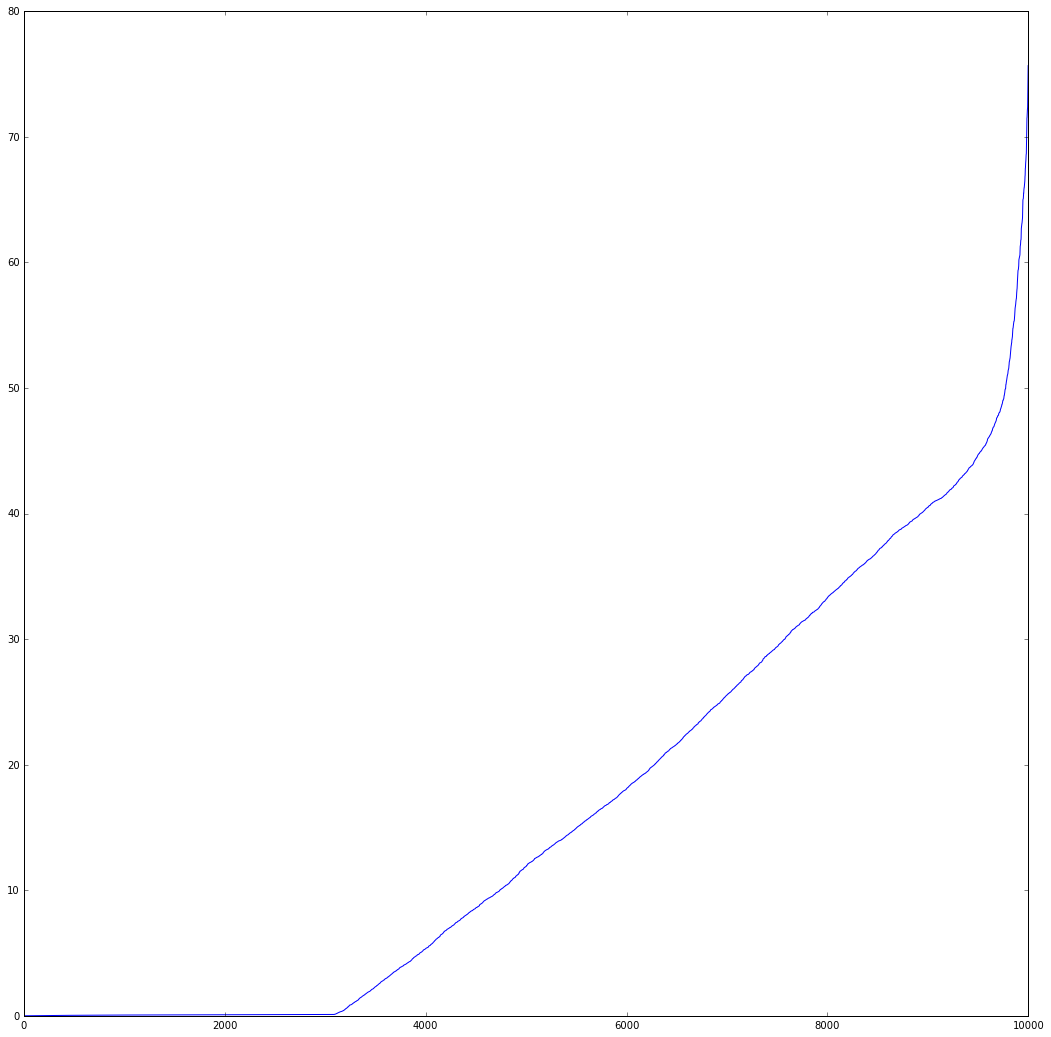

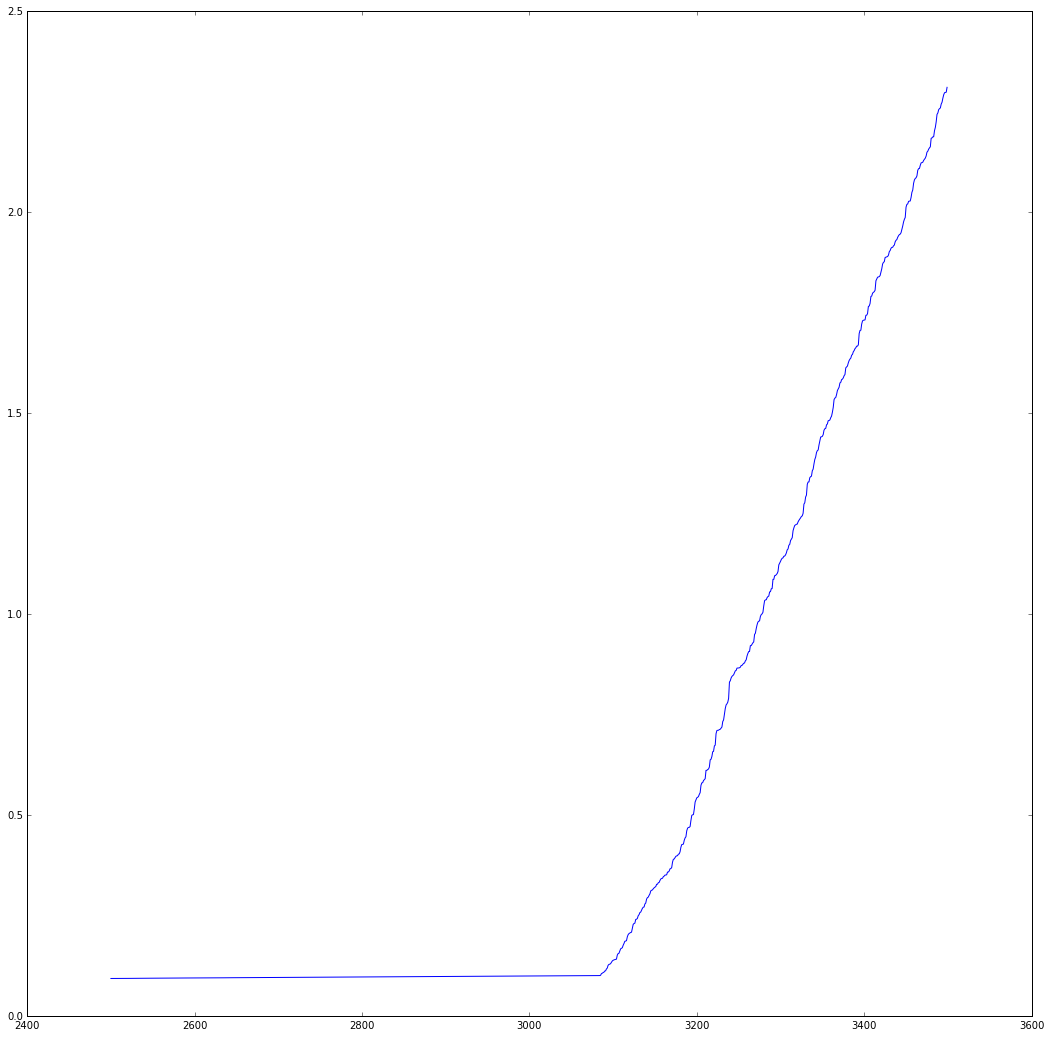

In [40]:
fig = plt.figure(figsize=(18,18))
tabC.sort()
tabCcenti = [x * 100 for x in tabC]
x = range(len(tabCcenti))
plt.plot(x, tabCcenti)
#plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.show()

fig = plt.figure(figsize=(18,18))
tabC.sort()
tabCcenti = [x * 100 for x in tabC]
x = range(len(tabCcenti))
plt.plot(x[2500:3500], tabCcenti[2500:3500])
#plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.show()

In [41]:
#$error_max_ik = 0.001
#$convergence_error_ik = 0.00001
#$iter_max_ik = 100

tabI = []

for i, vec in enumerate(tab):
        tabI.append(tab[i][3])
    
iterMax = max(tabI)
iterMin = min(tabI)
meanIter = reduce(lambda x, y: x + y, tabI) / len(tabI)
print "iter max: " + str(iterMax)
print "iter min: " + str(iterMin)
print "mean iter: " + str(meanIter)



iter max: 100
iter min: 1
mean iter: 12


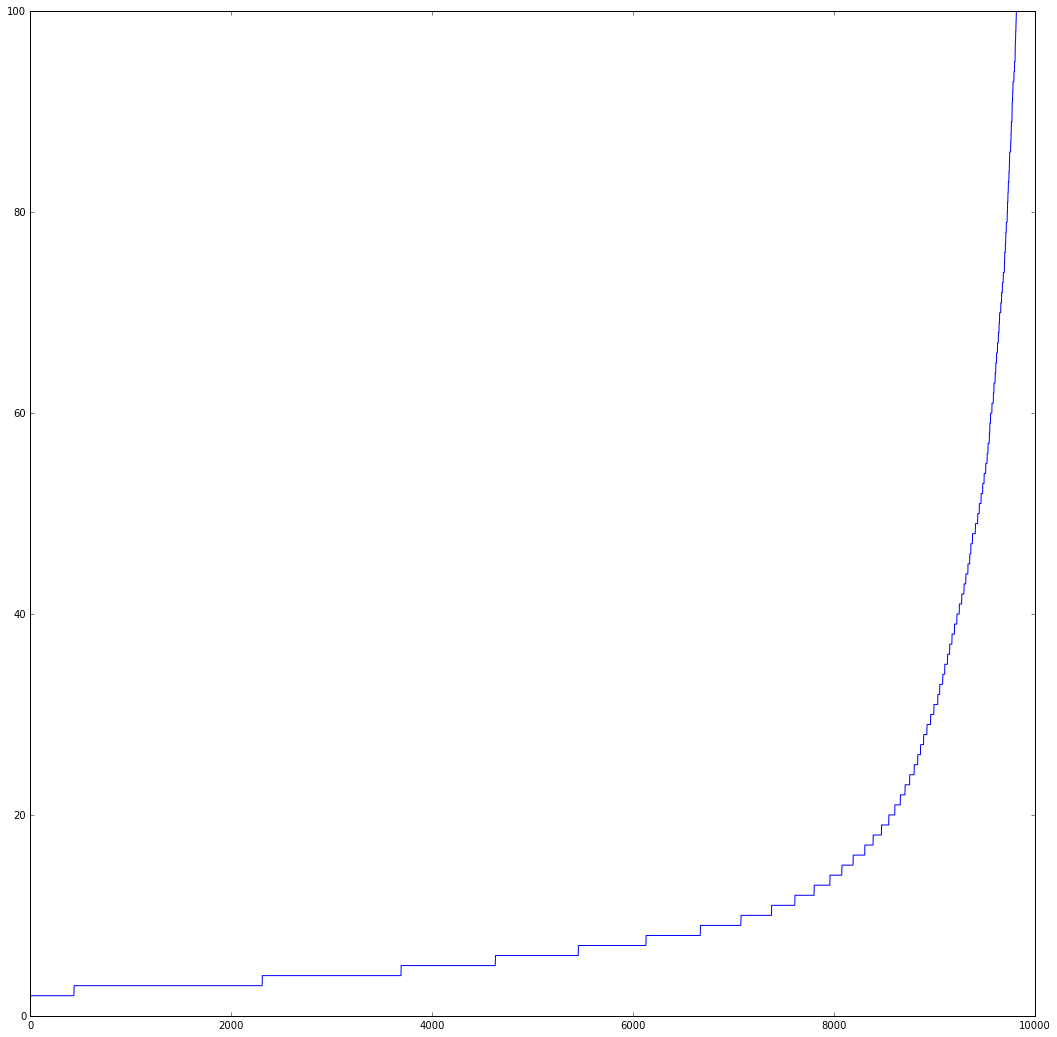

In [42]:
fig = plt.figure(figsize=(18,18))
tabI.sort()
x = range(len(tabI))
plt.plot(x, tabI)
#plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.show()

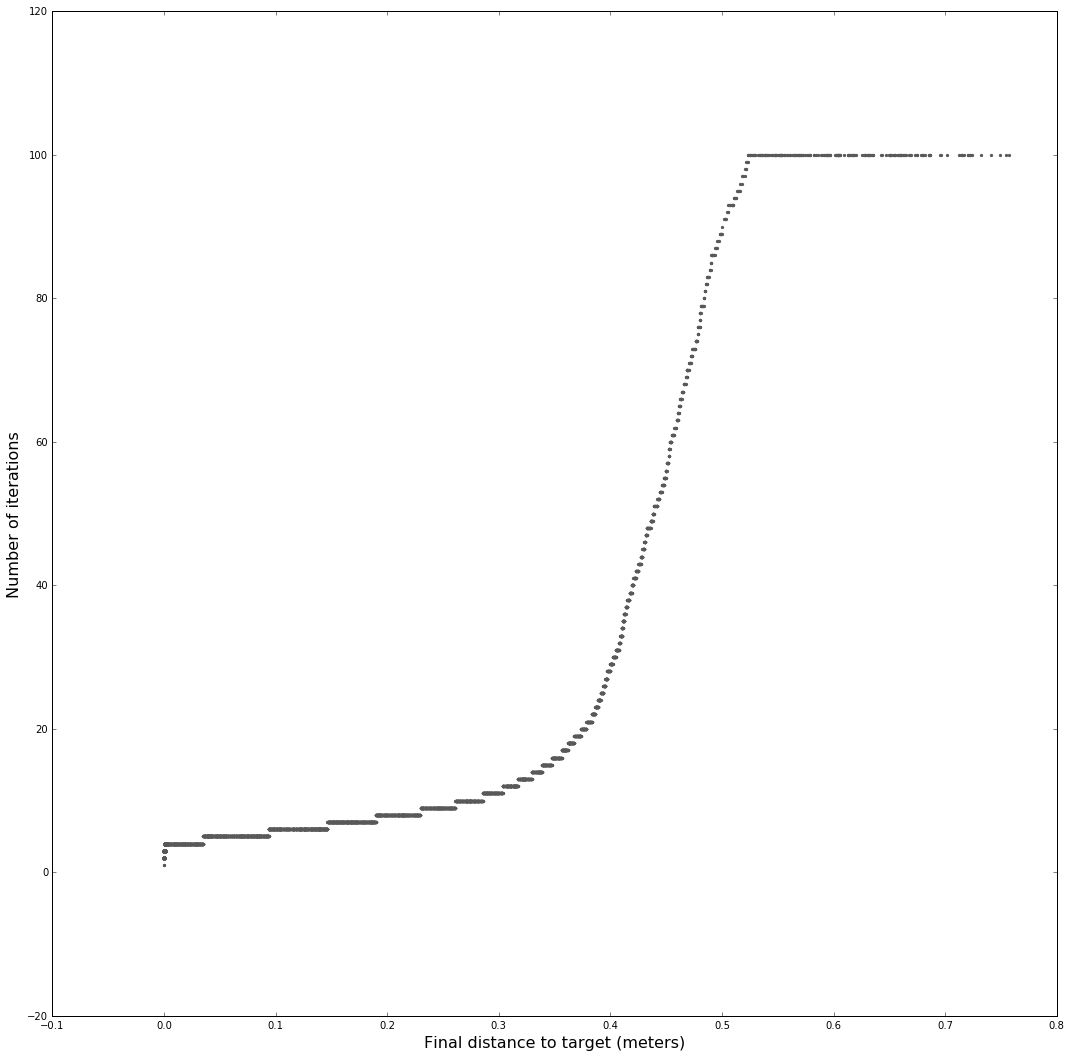

In [44]:
fig = plt.figure(figsize=(18,18))
plt.scatter(tabC, tabI,color='0.35', s=5)
#plt.axis([-armLength, armLength , -armLength+ baseOffset, armLength + baseOffset])
plt.ylabel('Number of iterations', fontsize=16, color='black')
plt.xlabel('Final distance to target (meters)', fontsize=16, color='black')
plt.show()

In [ ]:
# box with != distances
# two boxes with != radius/angle and distances
# put one thing on top of another
# initial position
# 
plt.xlabel(r'$\vec{x}$ axis (meters)', fontsize=16, color='black')
plt.ylabel(r'$\vec{z}$ axis (meters)', fontsize=16, color='black')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 18
cbar.set_label('Final distance from target (meters)', fontsize=16, rotation=270)